In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [11]:
data=pd.read_csv('/content/AirPassengers.csv')

In [2]:
plt.rcParams['figure.figsize'] = [12,6] #plt.rcParams is a dictionary-like object in Matplotlib that stores global settings for plots. The "rc" in rcParams stands for runtime configuration. It allows you to customize default styles for figures, fonts, colors, sizes, and more.

In [3]:
N=1000

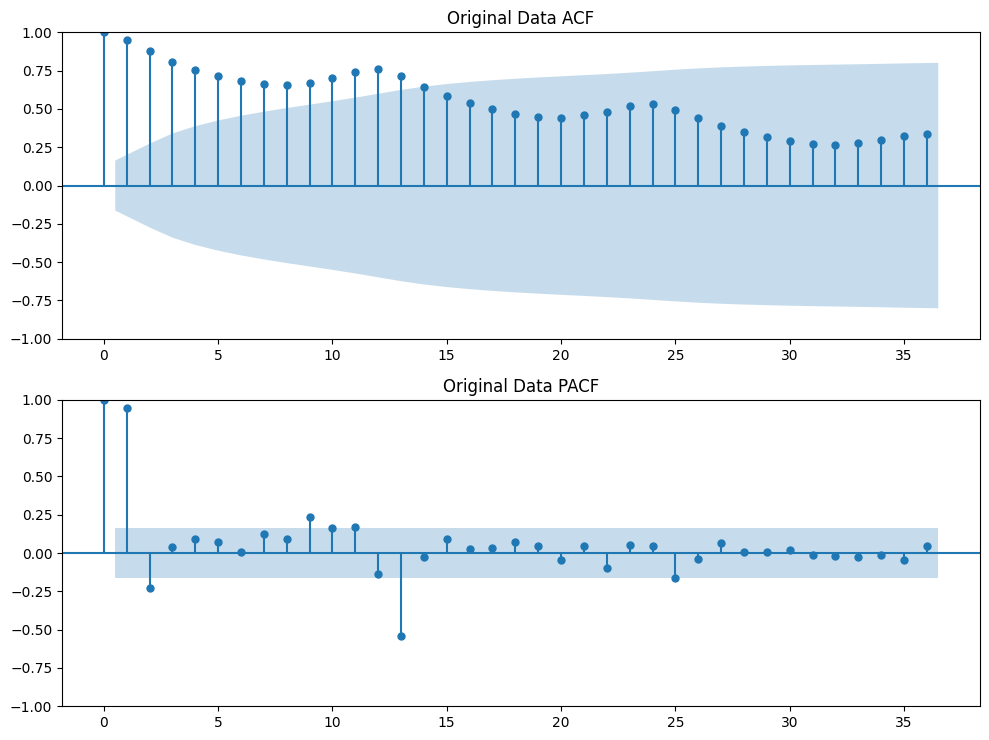

In [32]:
X=data['#Passengers']
plt.subplot(2, 1, 1)
plot_acf(X, lags=len(X)/4, ax=plt.gca())
plt.title('Original Data ACF')
plt.subplot(2, 1, 2)
plot_pacf(X, lags=len(X)/4, ax=plt.gca())
plt.title('Original Data PACF')
plt.tight_layout()
plt.show()

In [34]:
arma11_model = ARIMA(X, order=(1, 0, 1)).fit()
phi1_arma11 = arma11_model.params['ar.L1']
theta1_arma11 = arma11_model.params['ma.L1']

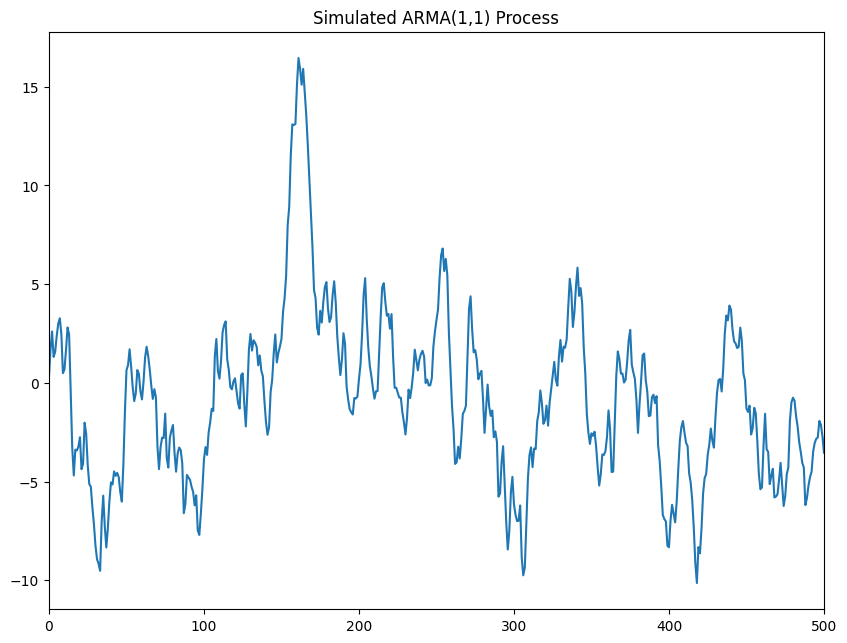

In [35]:
ar1 = np.array([1, -phi1_arma11])
ma1 = np.array([1, theta1_arma11])
ARMA_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=N)
plt.plot(ARMA_1)
plt.title('Simulated ARMA(1,1) Process')
plt.xlim([0, 500])
plt.show()

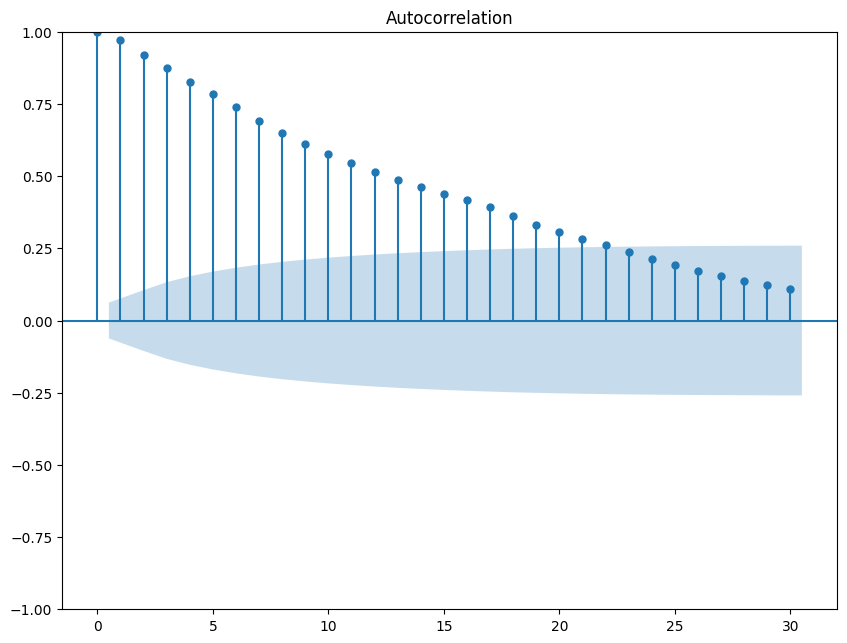

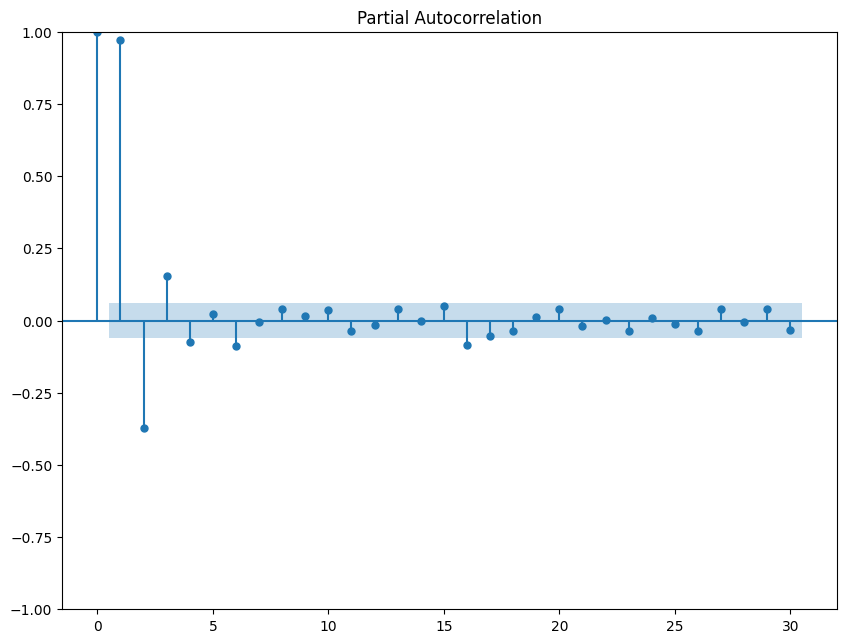

In [36]:
plot_acf(ARMA_1)
plt.show()
plot_pacf(ARMA_1)
plt.show()

In [37]:
arma22_model = ARIMA(X, order=(2, 0, 2)).fit()
phi1_arma22 = arma22_model.params['ar.L1']
phi2_arma22 = arma22_model.params['ar.L2']
theta1_arma22 = arma22_model.params['ma.L1']
theta2_arma22 = arma22_model.params['ma.L2']

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


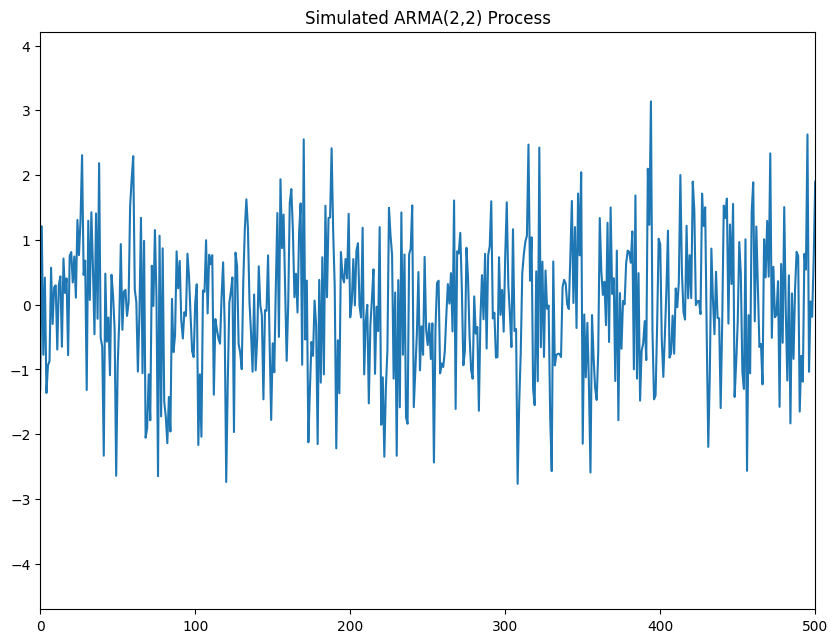

In [38]:
ar_2 = np.array([1, -phi1_arma22, -phi2_arma22])
ma_2 = np.array([1, theta1_arma22, theta2_arma22])
ARMA_2 = ArmaProcess(ar2, ma2).generate_sample(nsample=N*10)
plt.plot(ARMA_2)
plt.title('Simulated ARMA(2,2) Process')
plt.xlim([0, 500])
plt.show()

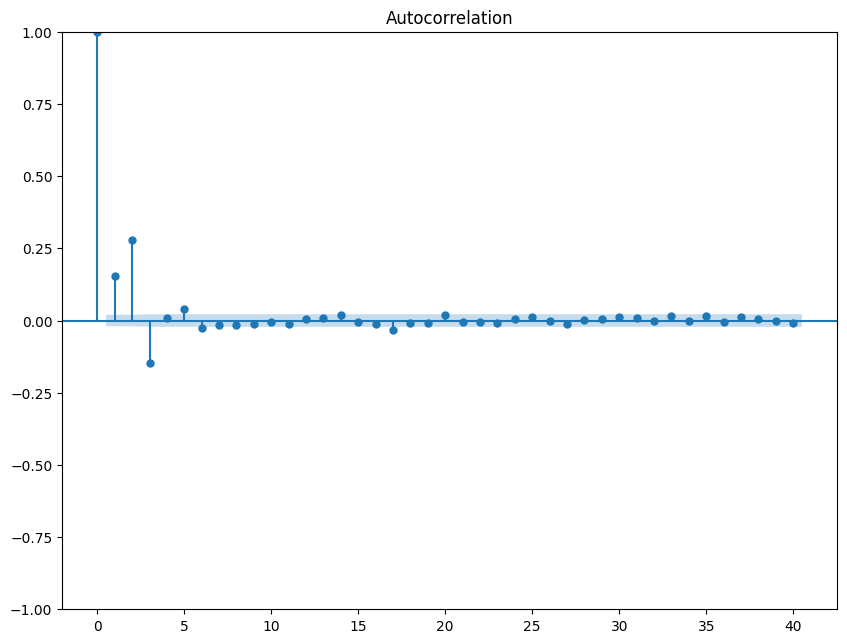

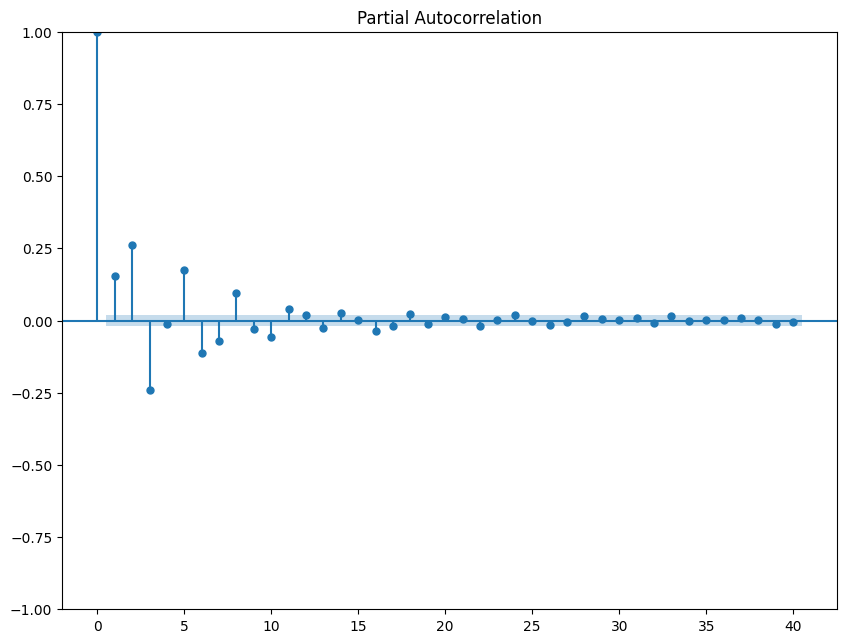

In [39]:
plot_acf(ARMA_2)
plt.show()
plot_pacf(ARMA_2)
plt.show()
